In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.linear_model import LinearRegression

# Régression linéaire

In [2]:
house = pd.read_csv('house.csv')
house.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [34]:
house = house[house['loyer']<10000]

In [35]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 0 to 544
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   loyer    536 non-null    int64
 1   surface  536 non-null    int64
dtypes: int64(2)
memory usage: 12.6 KB


In [36]:
house.shape

(536, 2)

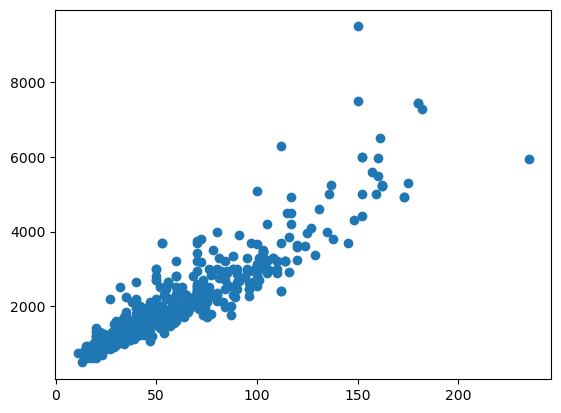

In [37]:
plt.scatter(house['surface'], house['loyer'])

In [38]:
X = house['surface'].values
y = house['loyer'].values

In [39]:
X = X.reshape(X.shape[0], 1)
y = y.reshape(y.shape[0], 1)

In [40]:
print(X.shape)
print(y.shape)

(536, 1)
(536, 1)


In [41]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

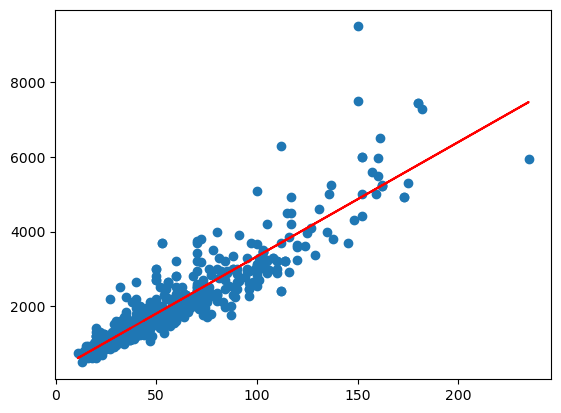

In [42]:
plt.plot(X, model.predict(X), c='r')
plt.scatter(X, y)

In [43]:
model.score(X, y)

0.8246543068110018

# K-NN

In [47]:
from sklearn.datasets import fetch_openml

In [93]:
import random as rd

In [48]:
fetch_openml

<function sklearn.datasets._openml.fetch_openml(name: Optional[str] = None, *, version: Union[str, int] = 'active', data_id: Optional[int] = None, data_home: Optional[str] = None, target_column: Union[str, List, NoneType] = 'default-target', cache: bool = True, return_X_y: bool = False, as_frame: Union[str, bool] = 'auto')>

In [51]:
mnist = fetch_openml('mnist_784', version=1)

In [106]:
X = mnist.data

In [107]:
X.shape

(70000, 784)

In [116]:
X_sample = X.sample(n=5000, random_state=0).values
X_sample

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
X_sample.shape

(5000, 784)

In [115]:
y = mnist.target
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [129]:
y_sample = y.sample(n=5000, random_state=0).values
y_sample

['0', '4', '1', '2', '7', ..., '6', '8', '2', '5', '4']
Length: 5000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [121]:
y_sample = y_sample.reshape(y_sample.shape[0], 1)

In [130]:
y_sample.shape

(5000,)

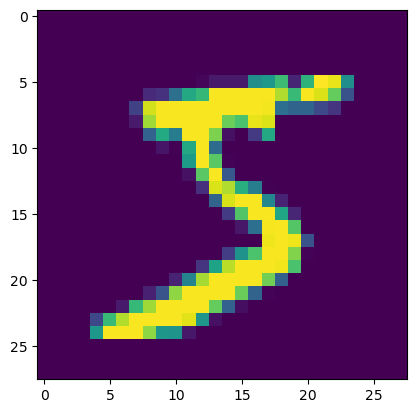

In [76]:
plt.imshow(X[0].reshape(28,28))

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [131]:
# train set et test set

X_train, X_test, y_train, y_test= train_test_split(X_sample, y_sample, train_size=0.8)

In [132]:
y_train.shape

(4000,)

In [133]:
# modèle

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

KNeighborsClassifier()

In [145]:
X_test[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        37., 218., 255.,  14.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0., 215., 25

In [150]:
# on met le Xtest dans une liste pour rajouter une dimension
model.predict([X_test[20]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['0'], dtype=object)

In [151]:
y_test[20]

'0'

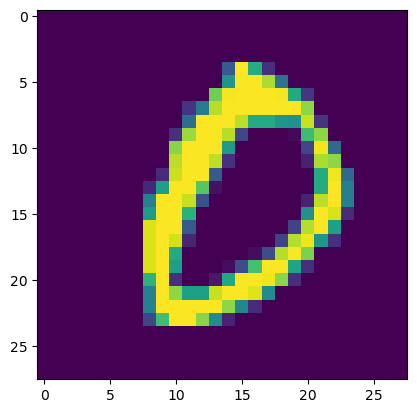

In [152]:
plt.imshow(X_test[20].reshape(28,28))

In [153]:
# performance du modèle
model.score(X_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.928

#### Boucle pour avoir le nombre de voisin optimal

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

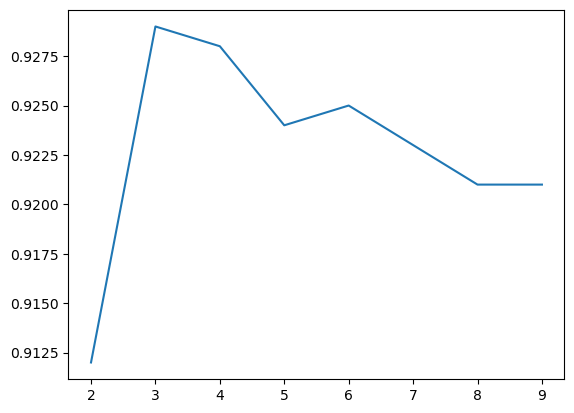

In [154]:
# train set et test set

X_train, X_test, y_train, y_test= train_test_split(X_sample, y_sample, train_size=0.8)

list_score = []

for n in range(2,10):
    # modèle

    model = KNeighborsClassifier(n_neighbors=n)

    model.fit(X_train, y_train)

    # performance du modèle
    score = model.score(X_test, y_test)
    
    list_score.append(score)
    
plt.plot(range(2,10), list_score)

In [155]:
list_score

[0.912, 0.929, 0.928, 0.924, 0.925, 0.923, 0.921, 0.921]

### Visualisation

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


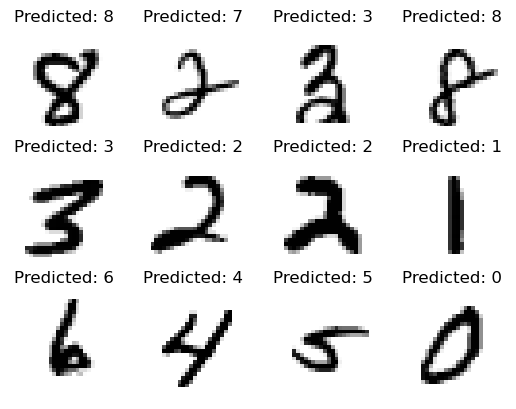

In [160]:
# On récupère le classifieur le plus performant
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

# On récupère les prédictions sur les données test
predicted = knn.predict(X_test)

# On redimensionne les données sous forme d'images
images = X_test.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

In [165]:
# visualisation des prédictions fausses
prediction = knn.predict(X_test)

misclass = prediction != y_test

# booléen
misclass

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [175]:
# reshape au format image
X_misclass = X_test[misclass].reshape(71,28,28)

In [176]:
# image correspondant aux erreurs de prédictions
X_misclass.shape

(71, 28, 28)

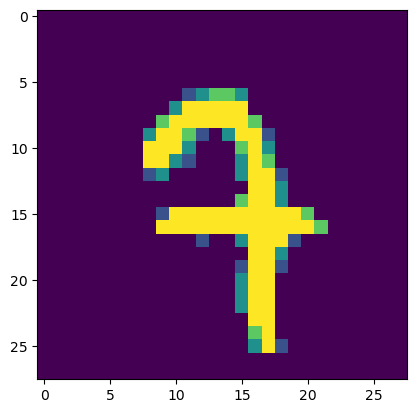

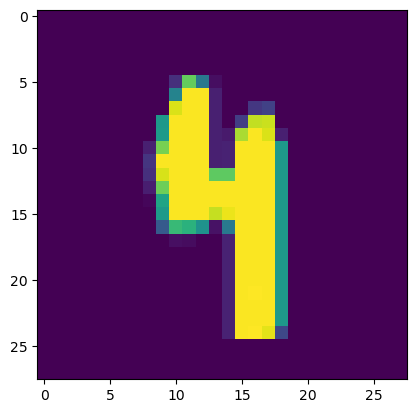

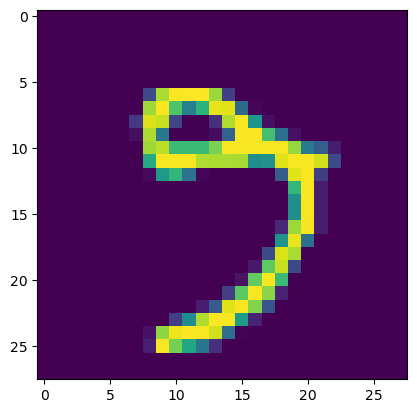

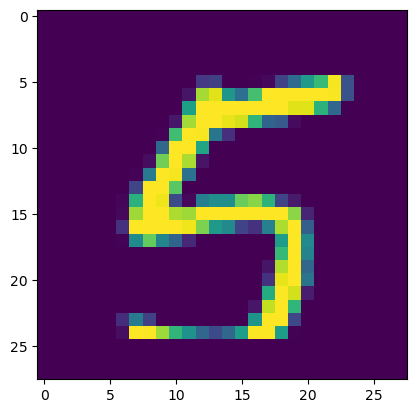

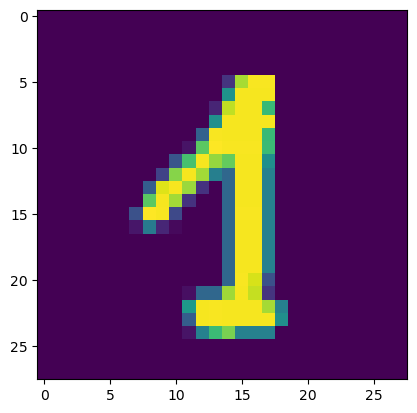

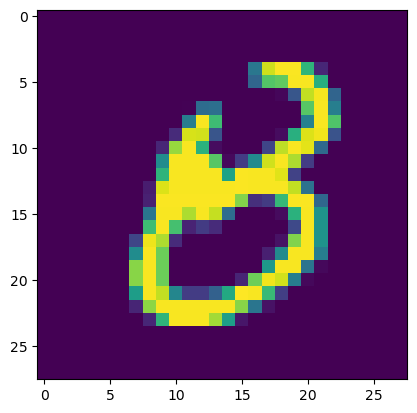

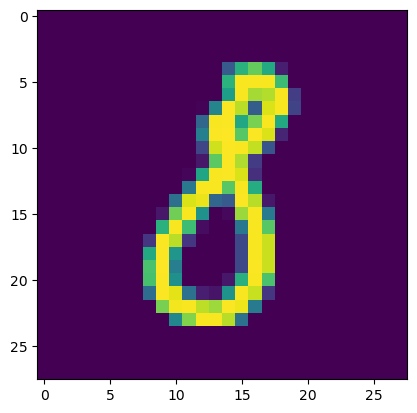

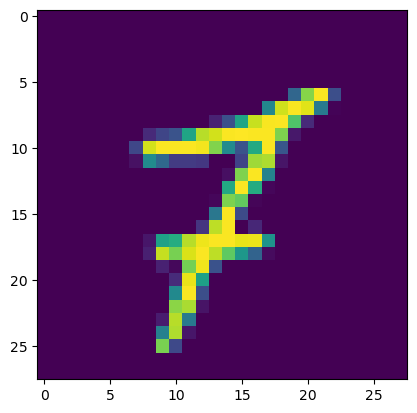

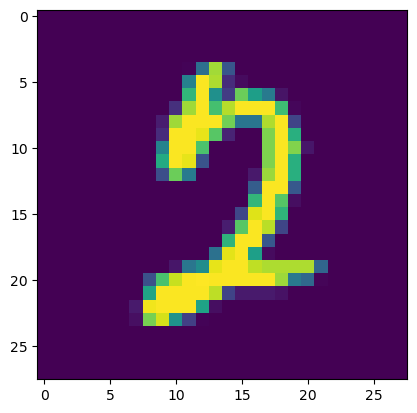

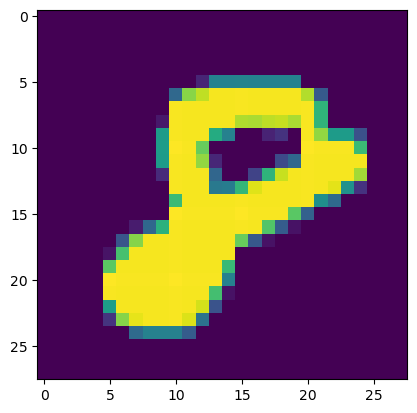

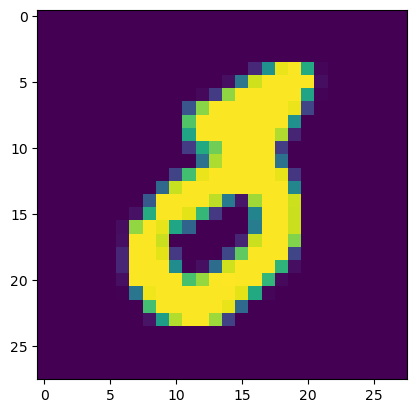

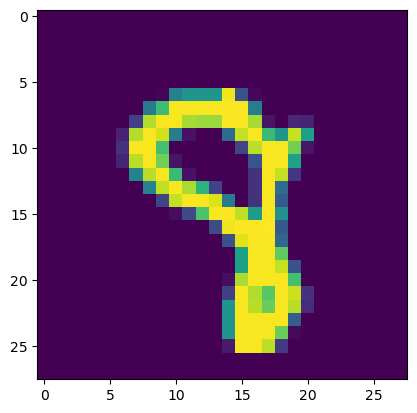

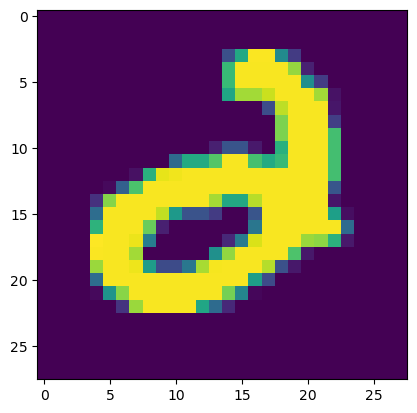

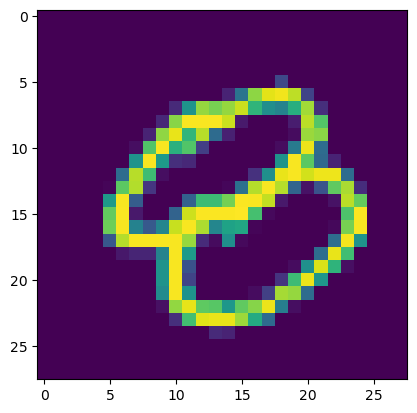

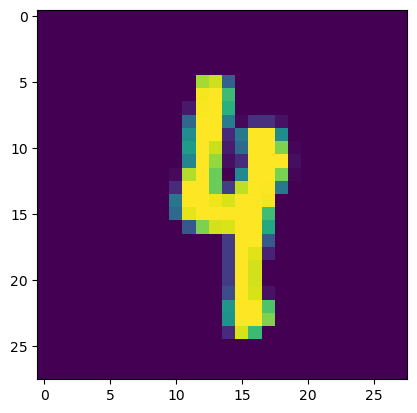

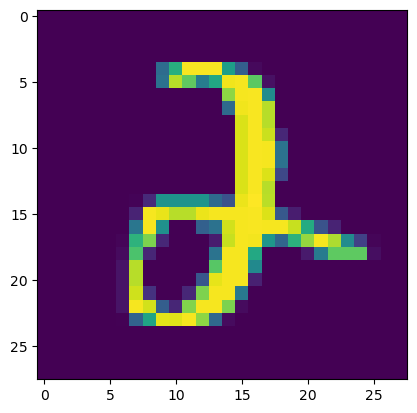

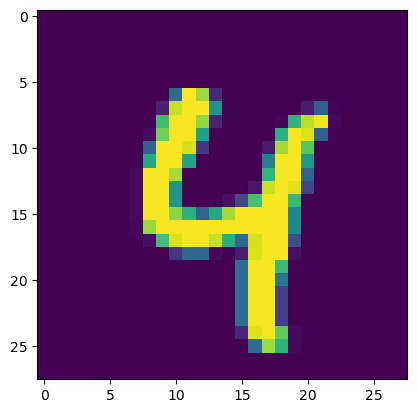

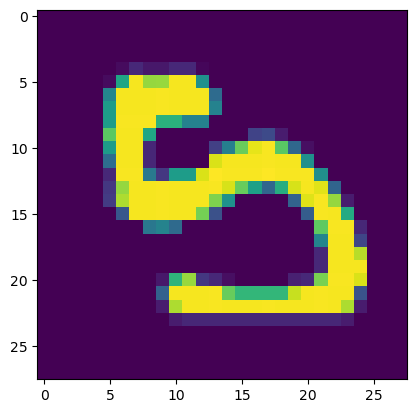

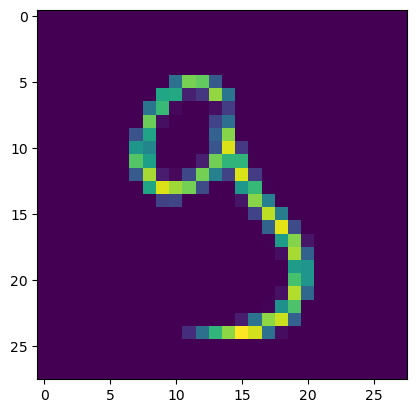

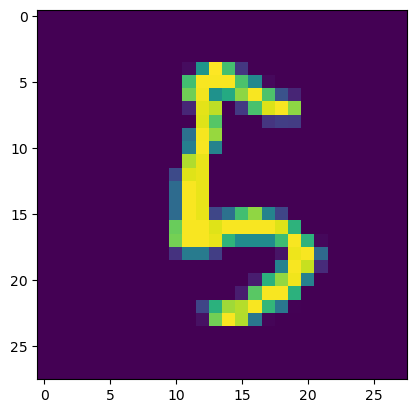

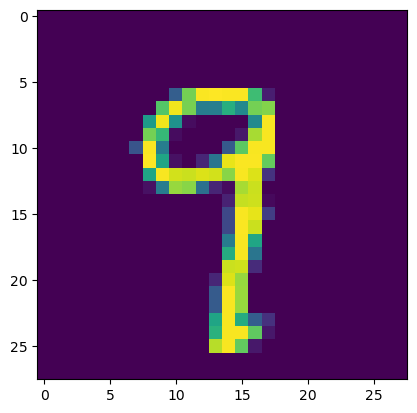

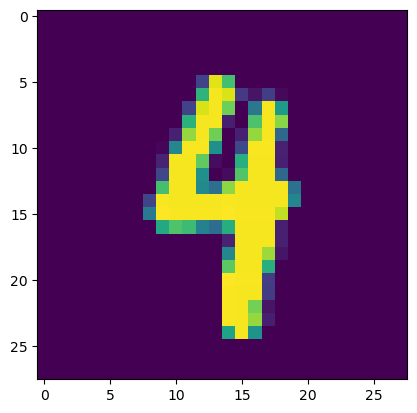

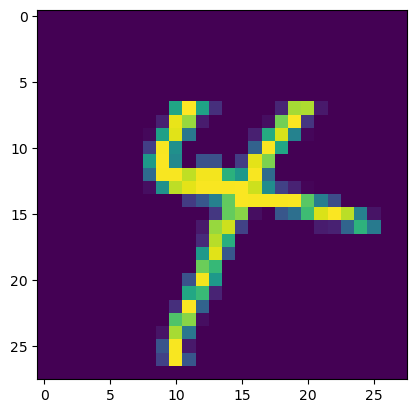

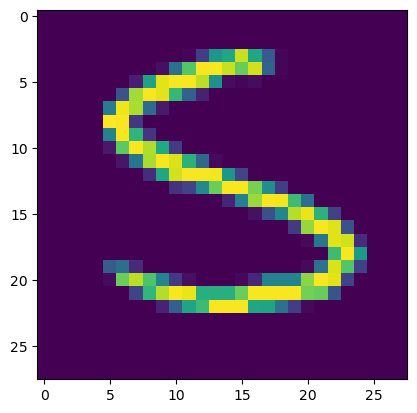

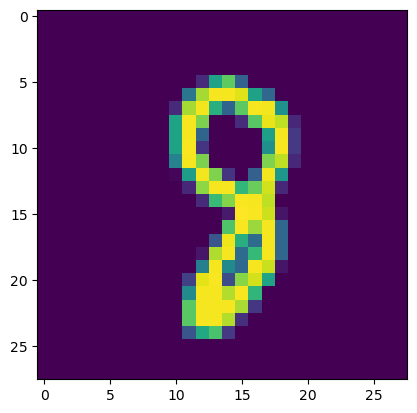

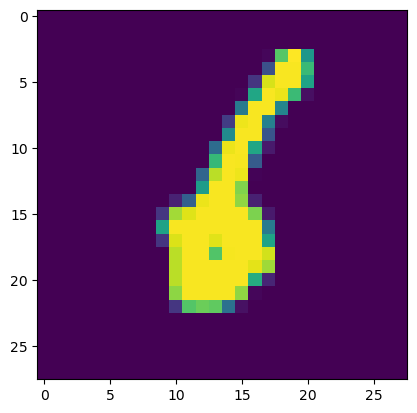

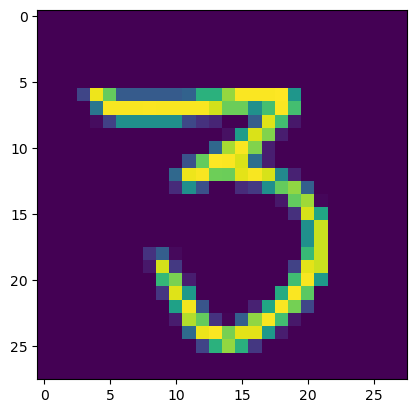

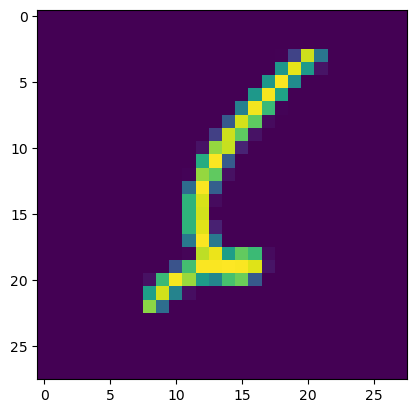

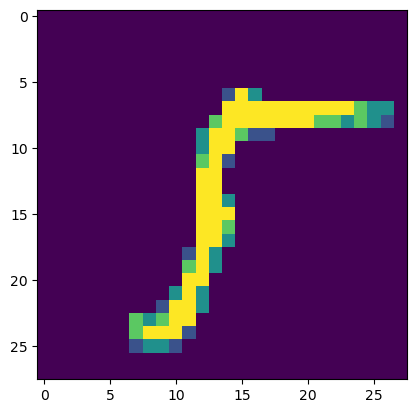

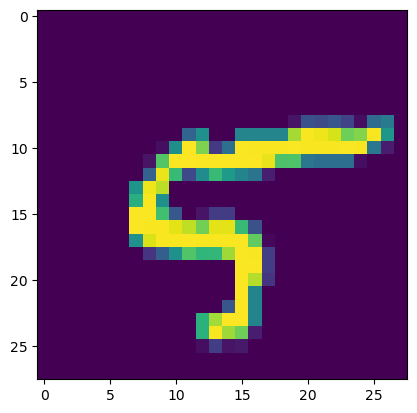

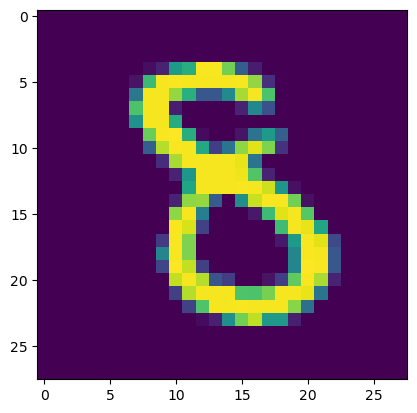

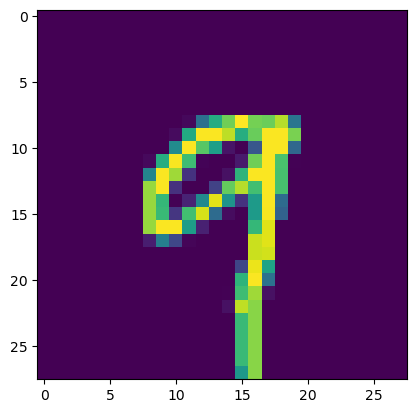

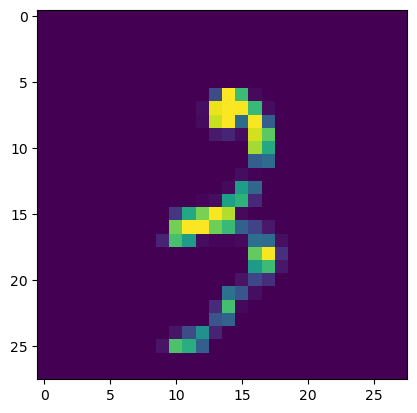

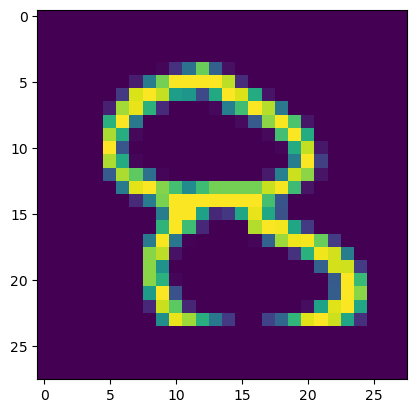

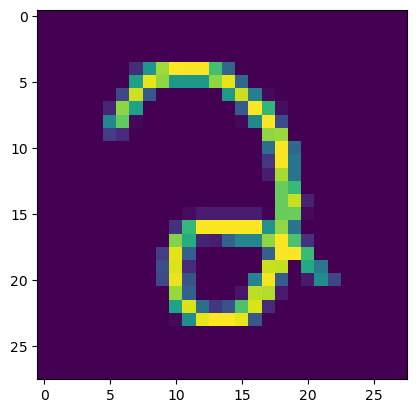

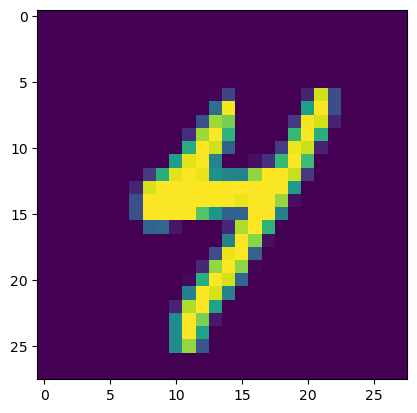

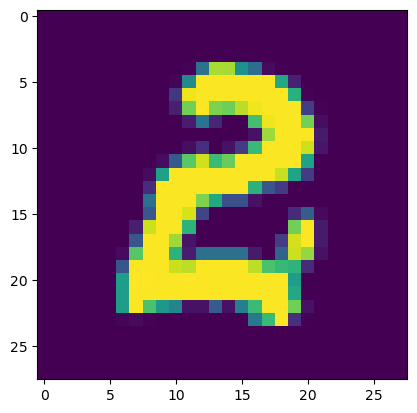

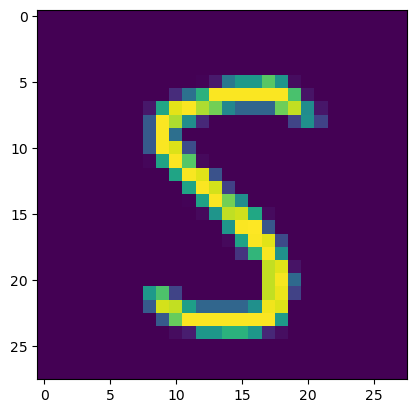

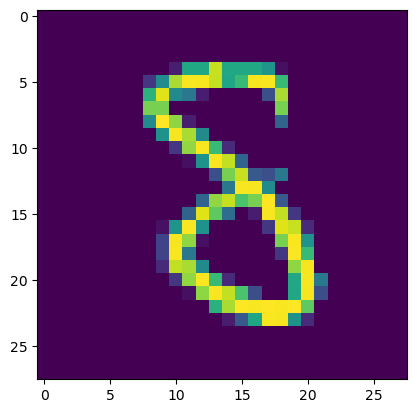

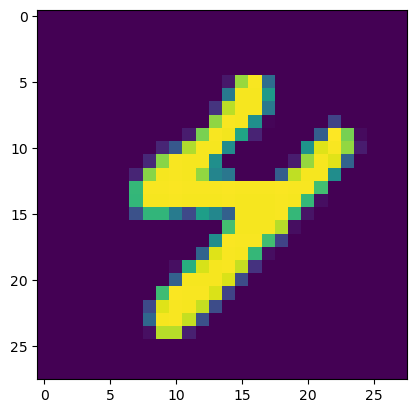

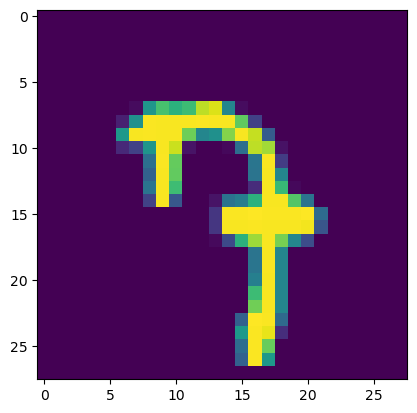

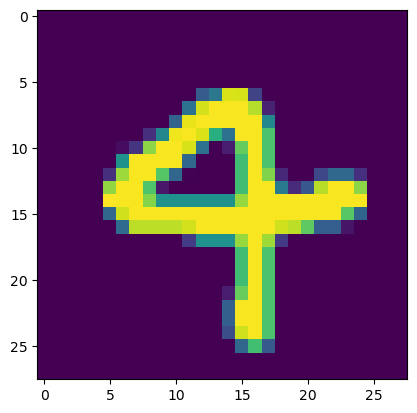

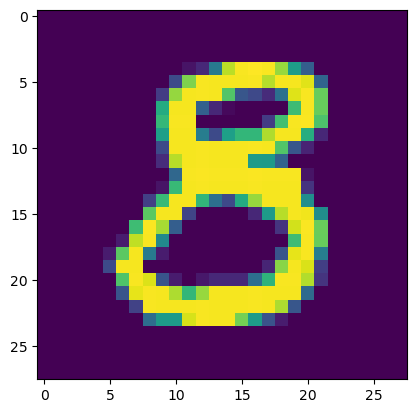

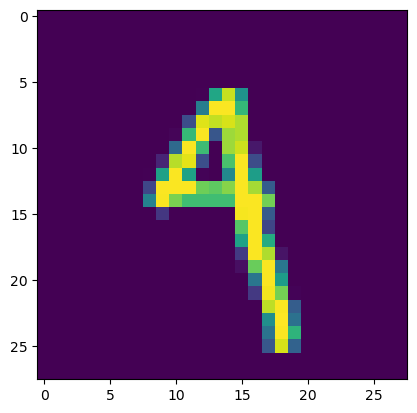

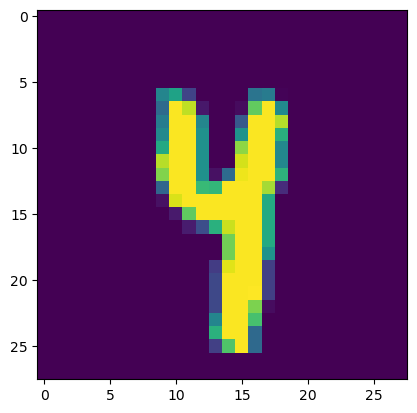

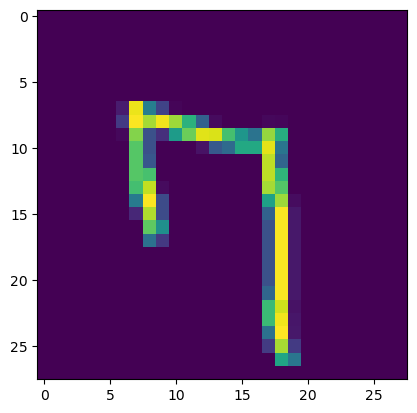

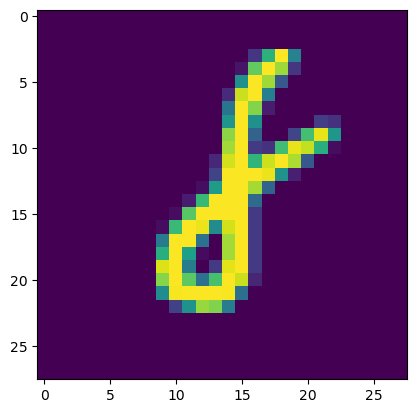

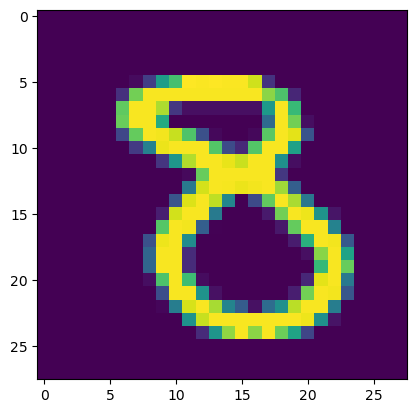

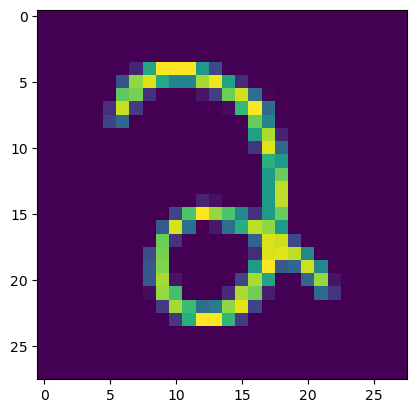

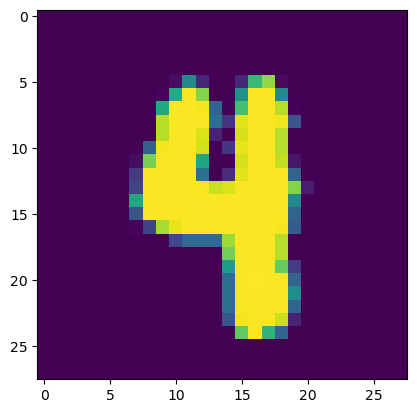

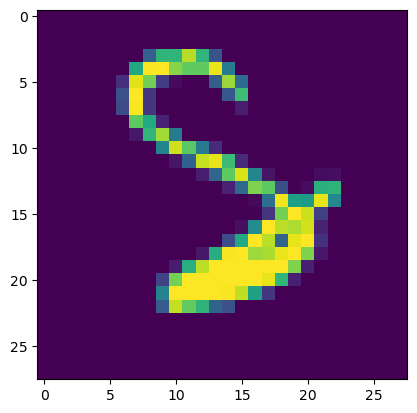

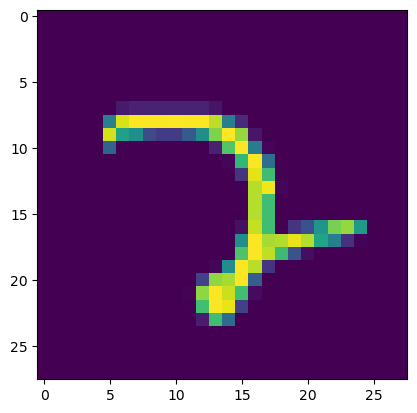

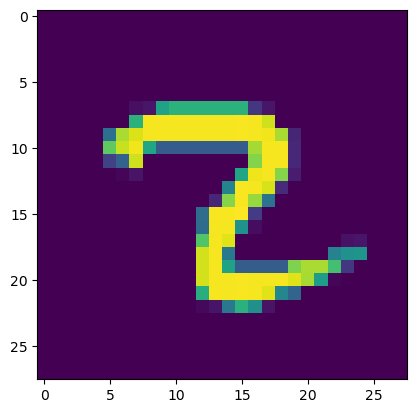

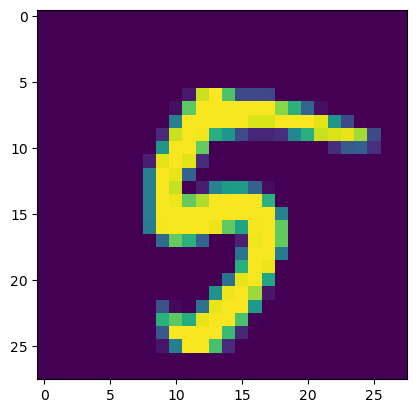

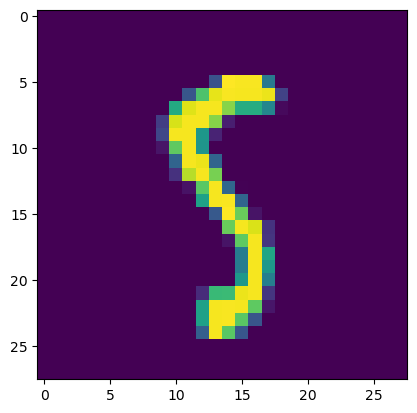

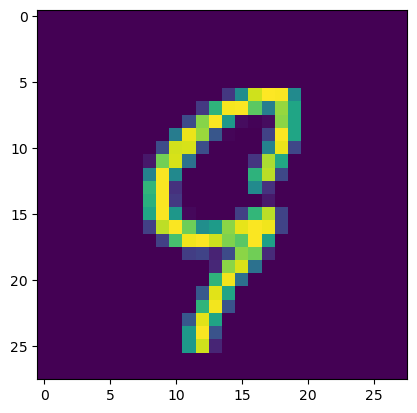

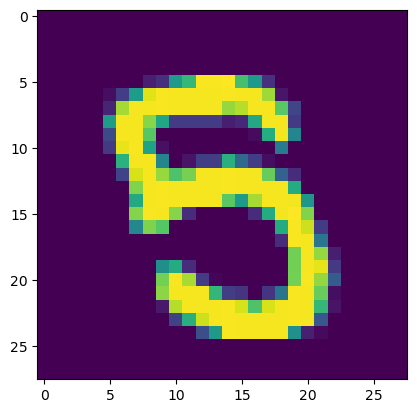

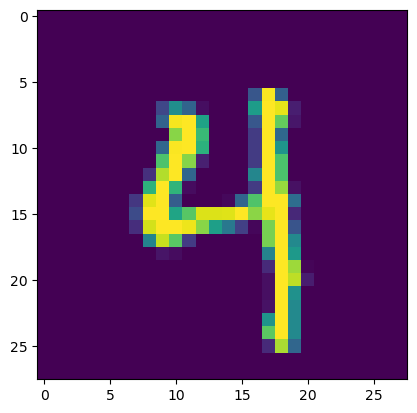

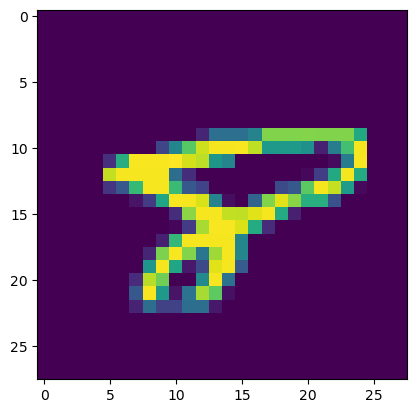

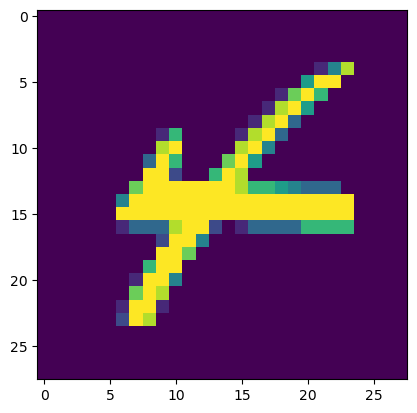

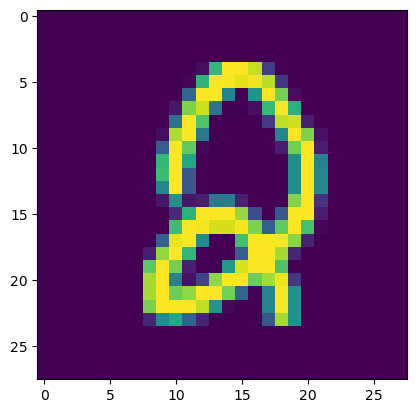

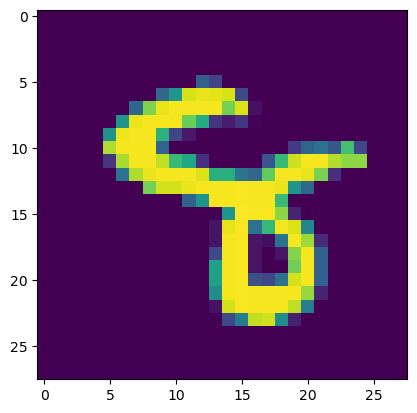

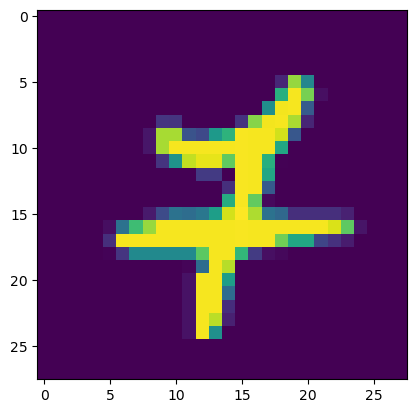

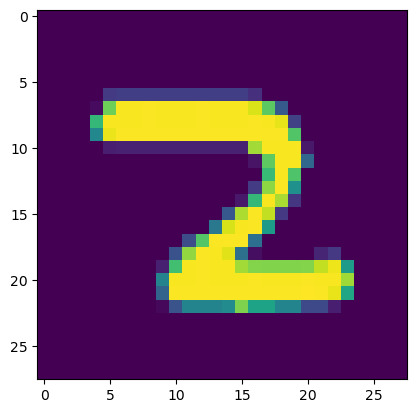

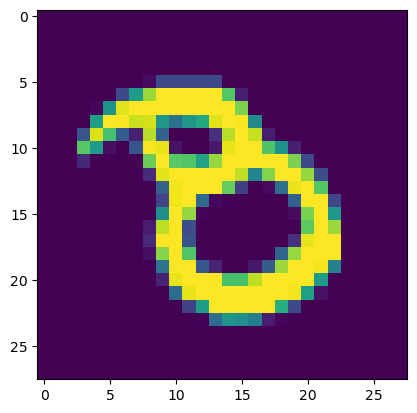

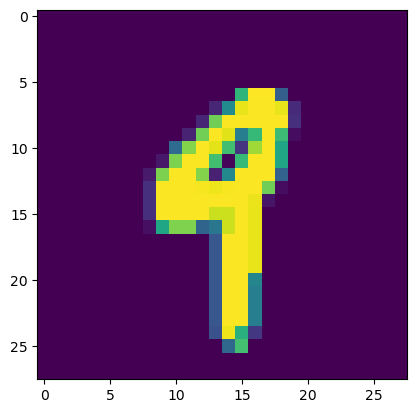

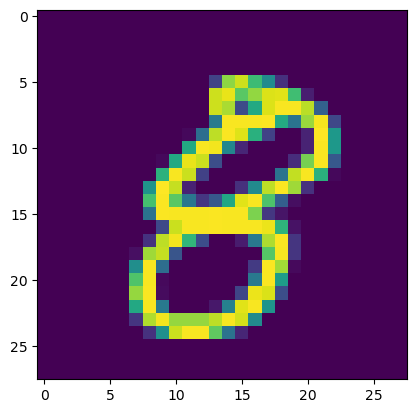

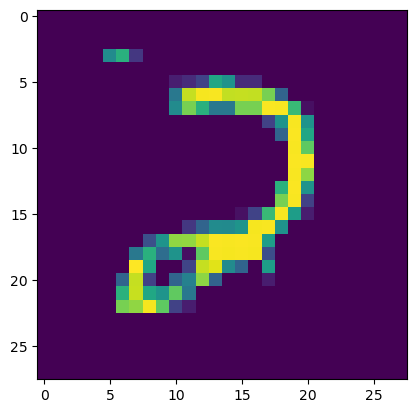

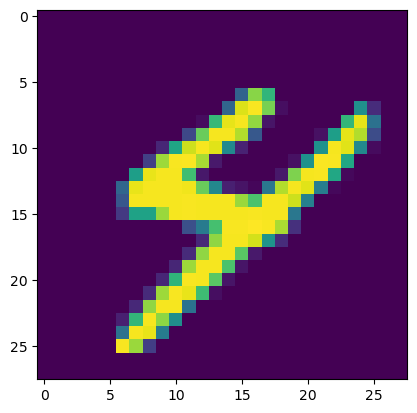

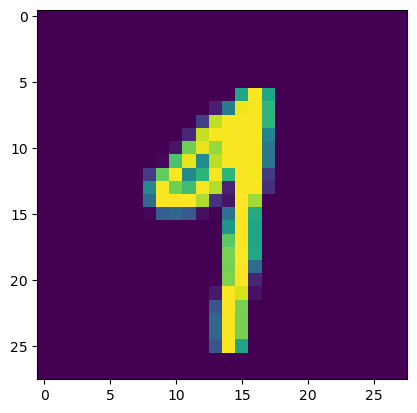

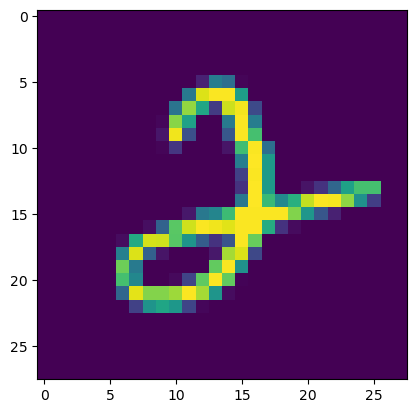

In [181]:
for element in X_misclass:
    plt.imshow(element)
    plt.show()

In [ ]:
# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(misclass_predicted[value]) )

plt.show()

# TD Agence immobilière

In [219]:
from sklearn.preprocessing import StandardScaler

In [184]:
data = pd.read_csv('house_data.csv')
data.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [194]:
data = data[data['price']<10000]

In [195]:
data.shape

(818, 3)

In [196]:
data['arrondissement'].value_counts()

4.0     177
3.0     175
10.0    174
1.0     157
2.0     130
Name: arrondissement, dtype: int64

<AxesSubplot:xlabel='surface', ylabel='price'>

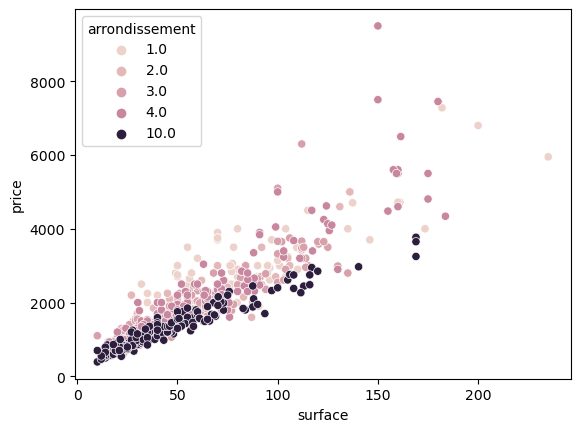

In [197]:
sns.scatterplot(data=data, x='surface', y='price', hue='arrondissement')

#### Utilisation KNN Regressor

In [198]:
data

,price,surface,arrondissement
0,1820,46.10,1.0
1,1750,41.00,1.0
2,1900,55.00,1.0
3,1950,46.00,1.0
4,1950,49.00,1.0
...,...,...,...
822,850,35.00,10.0
823,700,10.00,10.0
824,1280,34.00,10.0
825,1545,65.00,10.0


In [208]:
data = data.drop(data[data.isna().any(axis=1)].index)

In [223]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data

,price,surface,arrondissement
0,-0.033792,-0.257774,-0.989152
1,-0.095014,-0.400769,-0.989152
2,0.036176,-0.008234,-0.989152
3,0.079906,-0.260578,-0.989152
4,0.079906,-0.176463,-0.989152
...,...,...,...
808,-0.882150,-0.568998,1.819394
809,-1.013340,-1.269953,1.819394
810,-0.506074,-0.597036,1.819394
811,-0.274306,0.272148,1.819394


In [224]:
X = data.drop(columns='price')
y = data['price']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [226]:
from sklearn.neighbors import KNeighborsRegressor

In [227]:
model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8752813433925997

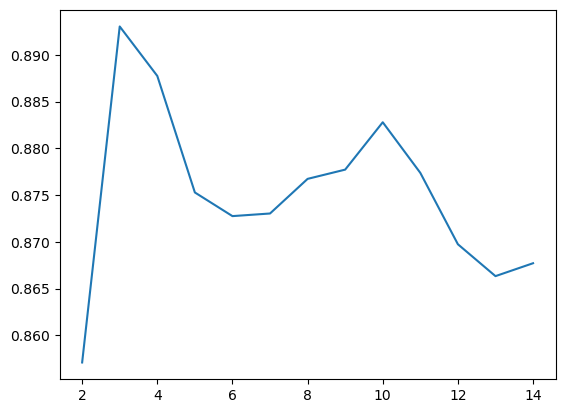

In [228]:
list_score = []

for n in range(2,15):
    # modèle

    model = KNeighborsRegressor(n_neighbors=n)

    model.fit(X_train, y_train)

    # performance du modèle
    score = model.score(X_test, y_test)
    
    list_score.append(score)
    
plt.plot(range(2,15), list_score)

In [230]:
model = KNeighborsRegressor(n_neighbors=3)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8930241196575883

On pourrait faire une régression linéaire par arrondissement.